In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import scipy.stats as stats

In [2]:
folder = 'PS_1k_5k_10k_PEG_in_agarose'
bucket = 'dtoghani.data'
experiment = '100nm_10k_PEG' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)

In [5]:
gSEM

{'100nm_10k_PEG_XY01': array([ 0.        ,  0.00336099,  0.00378147,  0.00426072,  0.00473427,
         0.00518743,  0.00565501,  0.00606386,  0.00645815,  0.00683087,
         0.00718591,  0.00754586,  0.00790324,  0.00837716,  0.00875856,
         0.00921693,  0.00957039,  0.0098547 ,  0.00992955,  0.01030657,
         0.01047752,  0.01073403,  0.01073174,  0.01088403,  0.0110984 ,
         0.0112386 ,  0.0114419 ,  0.01164415,  0.01179168,  0.01195595,
         0.012017  ,  0.01231719,  0.01228919,  0.01256987,  0.01283016,
         0.0128194 ,  0.01297472,  0.01288915,  0.01316402,  0.01334089,
         0.01344701,  0.01372801,  0.01392622,  0.01417082,  0.01427662,
         0.0145466 ,  0.01488554,  0.01490261,  0.01518457,  0.01562781,
         0.01556021,  0.01569543,  0.01613064,  0.01599982,  0.01605071,
         0.01607535,  0.01633089,  0.01652063,  0.01689749,  0.01700011,
         0.01726623,  0.01745702,  0.01777901,  0.01787891,  0.01782529,
         0.01826875,  0.01831

In [6]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    print(key)
    wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key],
                                                            bucket=bucket, folder=folder, experiment=key) 

for key in geo_slices:
    geo_slices[key][geo_slices[key]==0.0] = np.nan
    gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
    geo_slices[key] = ma.masked_invalid(geo_slices[key])
    gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(well_names, gSEM_slices)
geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

100nm_10k_PEG_W0


/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:586: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:631: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:633: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])


100nm_10k_PEG_W1
100nm_10k_PEG_W2
100nm_10k_PEG_W3


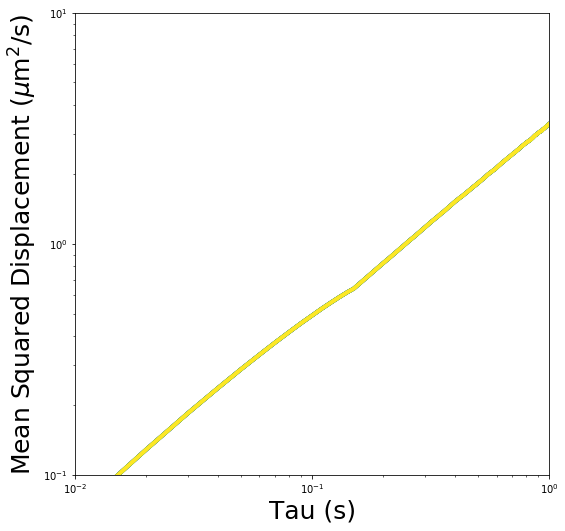

In [8]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder)

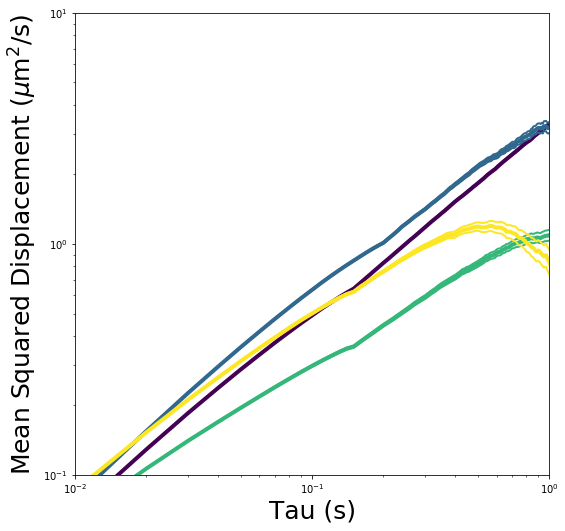

In [10]:
to_plot_f = ['100nm_10k_PEG', '100nm_5k_PEG', '100nm_1k_PEG_2', '100nm_PS_NPs_1']
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder)

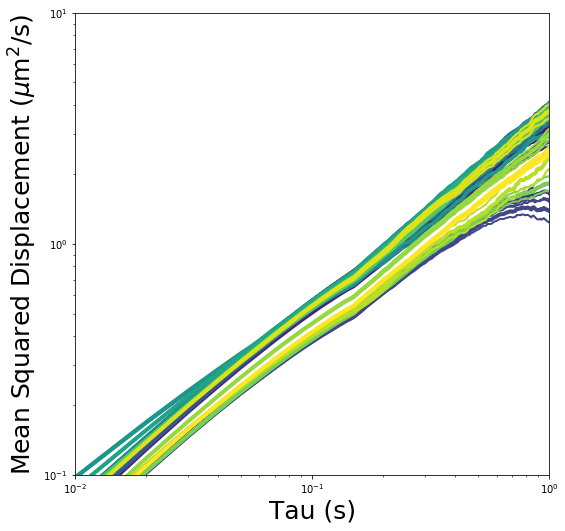

In [9]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
to_plot = []
for key in geo_slices:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
test = np.array([-5, -4, -3, -2, -1])
test = np.array([0.0001, 0.002, 0.03, 0.000005])
test2 = ma.log(test)
test2

In [ ]:
stats.sem(test)

In [7]:
gSEM

{'100nm_10k_PEG_XY01': array([ 0.        ,  0.00336099,  0.00378147,  0.00426072,  0.00473427,
         0.00518743,  0.00565501,  0.00606386,  0.00645815,  0.00683087,
         0.00718591,  0.00754586,  0.00790324,  0.00837716,  0.00875856,
         0.00921693,  0.00957039,  0.0098547 ,  0.00992955,  0.01030657,
         0.01047752,  0.01073403,  0.01073174,  0.01088403,  0.0110984 ,
         0.0112386 ,  0.0114419 ,  0.01164415,  0.01179168,  0.01195595,
         0.012017  ,  0.01231719,  0.01228919,  0.01256987,  0.01283016,
         0.0128194 ,  0.01297472,  0.01288915,  0.01316402,  0.01334089,
         0.01344701,  0.01372801,  0.01392622,  0.01417082,  0.01427662,
         0.0145466 ,  0.01488554,  0.01490261,  0.01518457,  0.01562781,
         0.01556021,  0.01569543,  0.01613064,  0.01599982,  0.01605071,
         0.01607535,  0.01633089,  0.01652063,  0.01689749,  0.01700011,
         0.01726623,  0.01745702,  0.01777901,  0.01787891,  0.01782529,
         0.01826875,  0.01831

In [ ]:
geoM2xy